In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from tqdm import tqdm as tqdm

In [2]:
# loading the dataset to a Pandas DataFrame
df = pd.read_csv('dataset/fraudTrain.csv')

## DATA CLEANING

In [3]:
# shows the column names as a list -> Syntax: dataframe_name.columns
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [4]:
# selecting only the necessary columns for prediction
df = df[['category', 'amt', 'gender', 'city_pop', 'is_fraud']]

In [5]:
# sample 5 entries randomly from the dataframe
df.sample(5)

,category,amt,gender,city_pop,is_fraud
617241,entertainment,98.24,M,21902,0
724620,gas_transport,30.81,M,153,0
622589,shopping_pos,12.38,M,258,0
645920,food_dining,43.95,F,237282,0
1289646,grocery_pos,47.06,F,8874,0


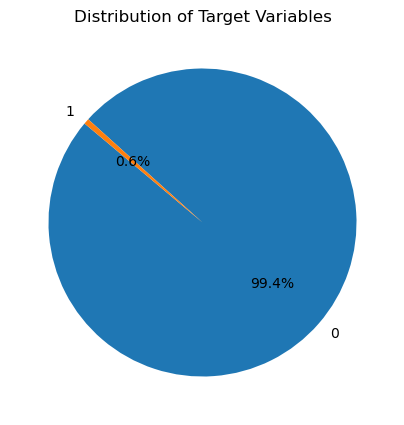

In [6]:
import matplotlib.pyplot as plt

# Group by category and calculate counts
counts = df['is_fraud'].value_counts()
labels = counts.index.tolist()
counts = counts.tolist()

plt.figure(figsize=(5, 5))  # Aspect ratio 1:1

# Create pie chart
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)

# Add a title
plt.title('Distribution of Target Variables')

# Display the plot
plt.show()


In [7]:
# One Hot encoding the categorical columns

In [8]:
import pandas as pd

df = pd.get_dummies(df, columns=['gender', 'category'])

df

,amt,city_pop,is_fraud,gender_F,gender_M,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,4.97,3495,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,107.23,149,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,220.11,4154,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,45.00,1939,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,41.96,99,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,15.56,258,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1296671,51.70,100,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1296672,105.93,899,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1296673,74.90,1126,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
#Min max scaling
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
df[df.drop(columns = ['is_fraud']).columns] = scaler.fit_transform(df[df.drop(columns = ['is_fraud']).columns])

df.head()


,amt,city_pop,is_fraud,gender_F,gender_M,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,0.000137,0.001194,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.003670,0.000043,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.007569,0.001421,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.001520,0.000659,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.001415,0.000026,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## Data Balancing

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, NearMiss, TomekLinks
from imblearn.combine import SMOTEENN

def compare_sampling_methods(dataset):
    """
    Function to compare different sampling methods (oversampling and undersampling) with RandomForestClassifier
    based on multiple metrics.
    
    Parameters:
    dataset (DataFrame): Input dataset with features and target variable.
    
    Returns:
    DataFrame: A DataFrame showing metrics (F1 score, Precision, Recall, ROC AUC) of RandomForestClassifier
               with different sampling methods.
    """
    # Split dataset into features (X) and target (y)
    X = dataset.drop(columns=['is_fraud'])  # Assuming 'target' is the name of the target column
    y = dataset['is_fraud']
    
    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Define oversampling and undersampling methods
    sampling_methods = {
        'RandomOverSampler': RandomOverSampler(random_state=42),
        'SMOTE': SMOTE(random_state=42),
        'ADASYN': ADASYN(random_state=42),
        'RandomUnderSampler': RandomUnderSampler(random_state=42),
        'NearMiss': NearMiss(version=1, n_neighbors=3)
    }
    
    # Initialize a DataFrame to store results
    results_df = pd.DataFrame(columns=['Sampling Method', 'F1 Score', 'Precision', 'Recall', 'ROC AUC'])
    
    # Train RandomForestClassifier on each sampled dataset and evaluate metrics
    for method_name, sampler in tqdm(sampling_methods.items()):
        # Sample the training set
        if 'UnderSampler' in method_name:
            X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
        else:
            X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
        
        # Train RandomForestClassifier
        rf = RandomForestClassifier(random_state=42)
        rf.fit(X_resampled, y_resampled)
        
        # Predict probabilities on test set
        y_pred_proba = rf.predict_proba(X_test)[:, 1]
        y_pred = rf.predict(X_test)
        
        # Calculate metrics
        f1 = f1_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        
        # Store results in DataFrame
        results_df = results_df.append({
            'Sampling Method': method_name,
            'F1 Score': f1,
            'Precision': precision,
            'Recall': recall,
            'ROC AUC': roc_auc
        }, ignore_index=True)
    
    return results_df


In [17]:
compare_sampling_methods(df)

  0%|                                                     | 0/5 [00:00<?, ?it/s]/var/folders/rz/4wkyghgs70q02_v9zvprnnhw0000gn/T/ipykernel_801/2738318754.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
 20%|████████▊                                   | 1/5 [02:03<08:15, 123.86s/it]/var/folders/rz/4wkyghgs70q02_v9zvprnnhw0000gn/T/ipykernel_801/2738318754.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
 40%|█████████████████▌                          | 2/5 [05:35<08:47, 175.70s/it]/var/folders/rz/4wkyghgs70q02_v9zvprnnhw0000gn/T/ipykernel_801/2738318754.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
 60%|████████

,Sampling Method,F1 Score,Precision,Recall,ROC AUC
0,RandomOverSampler,0.713662,0.728581,0.699342,0.954002
1,SMOTE,0.417967,0.274819,0.872368,0.986868
2,ADASYN,0.367819,0.231892,0.888816,0.987393
3,RandomUnderSampler,0.227398,0.128685,0.976316,0.994689
4,NearMiss,0.011768,0.005920,0.948684,0.789746


Using SMOTE. Since a good balance of all the scores. Can be further improved.<br>

### Splitting the Dataset

In [13]:
X = df.drop(columns=['is_fraud'])
y = df['is_fraud']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.2, random_state = 55, stratify = y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size = 0.5, random_state = 42, stratify = y_temp)

In [20]:
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score
from imblearn.over_sampling import SMOTE
import numpy as np

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Define SMOTE ratios
ratios = [0.1, 0.3, 0.5, 0.7, 1.0]

# Initialize a list to store results
results = []

for ratio in tqdm(ratios):
    smote = SMOTE(sampling_strategy=ratio, random_state=42)
    X_res, y_res = smote.fit_resample(X_train, y_train)
    
    # Step 4: Train logistic regression models
    model = RandomForestClassifier(random_state=42)
    model.fit(X_res, y_res)
    
    # Step 5: Evaluate models on the validation set
    y_pred = model.predict(X_val)
    y_pred_prob = model.predict_proba(X_val)[:, 1]
    
    f1 = f1_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    auc = roc_auc_score(y_val, y_pred_prob)
    
    results.append((ratio, f1, precision, recall, auc))

# Step 6: Store evaluation metrics in a dataframe
results_df = pd.DataFrame(results, columns=['SMOTE Ratio', 'F1 Score', 'Precision', 'Recall', 'AUC'])
print(results_df)


100%|████████████████████████████████████████████| 5/5 [11:26<00:00, 137.33s/it]

   SMOTE Ratio  F1 Score  Precision    Recall       AUC
0          0.1  0.589781   0.464605  0.807282  0.976721
1          0.3  0.493830   0.350540  0.835258  0.981441
2          0.5  0.448807   0.305196  0.847691  0.983438
3          0.7  0.429741   0.287472  0.850799  0.983854
4          1.0  0.406480   0.266336  0.857904  0.984070


In [21]:
# Taking ratio 0.5
ratio = 0.5
smote = SMOTE(sampling_strategy=ratio, random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [22]:
from collections import Counter
resampled_counter = Counter(y_train)
print(f"Resampled class distribution: {resampled_counter}")

Resampled class distribution: Counter({0: 902418, 1: 451209})


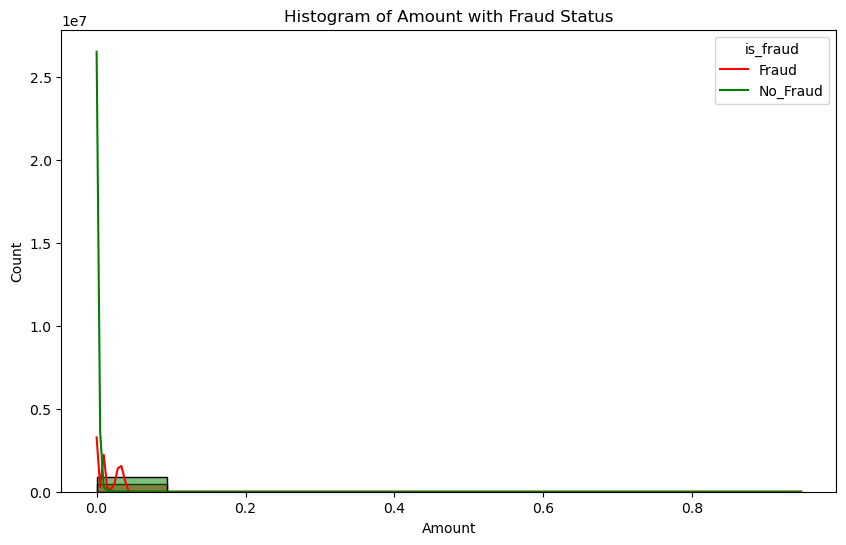

In [25]:
#plotting distribution of amount of transaction hued to fraud or is not fraud in Training set
plt.figure(figsize=(10, 6))
sns.histplot(data=X_train, x='amt', hue=y_train, kde=True, bins=10, palette={0: 'green', 1: 'red'})
plt.title('Histogram of Amount with Fraud Status')
plt.xlabel('Amount')
plt.ylabel('Count')
plt.legend(title='is_fraud', labels=['Fraud', 'No_Fraud'])
plt.show()

# Model Training

In [29]:
# Step 1: Install LazyPredict
!pip install --upgrade pip
!pip install lazypredict

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 490.2 kB/s eta 0:00:0000:0100:01
  Attempting uninstall: pip
    Found existing installation: pip 24.0
    Uninstalling pip-24.0:
      Successfully uninstalled pip-24.0


In [ ]:
import pandas as pd
from sklearn.metrics import f1_score, recall_score, precision_score, roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
import lightgbm as lgb

# Define your models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Classifier': SVC(probability=True),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'LightGBM': lgb.LGBMClassifier(),
    'AdaBoost': AdaBoostClassifier()
}

# Train-test split (if you haven't done so already)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dictionary to store the results
results = {
    'Model': [],
    'F1 Score': [],
    'Recall': [],
    'Precision': [],
    'ROC AUC': [],
    'Accuracy': []
}

# Train each model and compute metrics
for model_name, model in tqdm(models.items()):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    y_pred_prob = model.predict_proba(X_val)[:, 1] if hasattr(model, 'predict_proba') else model.decision_function(X_val)
    
    results['Model'].append(model_name)
    results['F1 Score'].append(f1_score(y_val, y_pred))
    results['Recall'].append(recall_score(y_val, y_pred))
    results['Precision'].append(precision_score(y_val, y_pred))
    results['ROC AUC'].append(roc_auc_score(y_val, y_pred_prob))
    results['Accuracy'].append(accuracy_score(y_val, y_pred))

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

results_df


 30%|█████████████▏                              | 3/10 [02:03<06:25, 55.12s/it]